In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import Algorithmia
import numpy as np
import ConfigParser

In [ ]:
propertiesFile = "my.properties"
cp = ConfigParser.ConfigParser()
cp.readfp(open(propertiesFile))

client_key = cp.get('algorithmia', 'client')

In [2]:
client = Algorithmia.client('sime9LW7bScBtTy8eag15oGxNKc1')
algo = client.algo('mtman/SentimentAnalysis/0.1.1')

In [3]:
inputs = ['I absolutely love the Hope Conference.  It is the most fun I have had in months!'
          , 'Radio Statler broadcasts from the Hotel Pennsylvania during Hope xi'
          , 'I hate the government because they spy on my email!!! Its the worst!']

results = []
for input in inputs:
    results.append(algo.pipe(input))

In [4]:
scores = []
for result in results:
    scores.append(result.result)

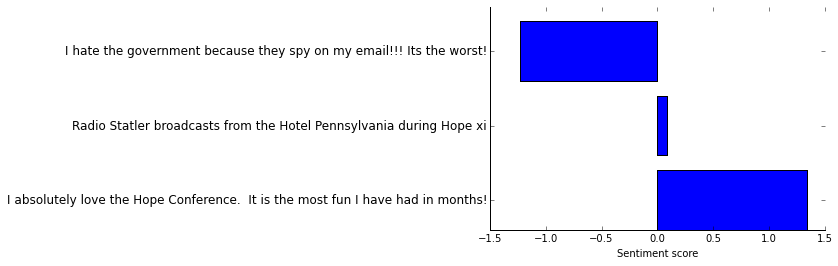

In [6]:
x = np.arange(len(scores))
plt.barh(x, scores)
plt.xlabel('Sentiment score')
plt.yticks(x + 0.4, inputs, fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [18]:
print(algo.pipe('i hate this').result)

-0.75


In [19]:
print(algo.pipe('i like you').result)

0


In [41]:
rFU = algo.pipe('fuck you')
print(rFU.result)

0.25


In [21]:
email = 'Hi credit card provider.  In my most recent statement, a finance charge of 14.90 is applied.  However, since the last statement, I paid the full previous balance, in fact, I paid several hundred over it.  What is the justification for this charge?'

In [22]:
print(email)

Hi credit card provider.  In my most recent statement, a finance charge of 14.90 is applied.  However, since the last statement, I paid the full previous balance, in fact, I paid several hundred over it.  What is the justification for this charge?


In [42]:
rEmail = algo.pipe(email)
print(rEmail)

AlgoResponse(result=-0.23197091273,metadata=Metadata(content_type='json',duration=0.006093262,stdout=None))


In [43]:
rHate = algo.pipe(email + ' I hate this')
print(rHate)

AlgoResponse(result=-0.98197091273,metadata=Metadata(content_type='json',duration=0.004613427,stdout=None))


In [44]:
rEmailFu = algo.pipe(email + ' fuck you')
print(rEmailFu)

AlgoResponse(result=0.0180290872705,metadata=Metadata(content_type='json',duration=0.004609781,stdout=None))


In [45]:
print(rEmailFu.result - rEmail.result)
print(rFU.result)

0.25
0.25
